In [39]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('max_rows', None)
from sklearn import linear_model

oly = pd.read_csv("oly_gdp_hdi.csv")
oly[oly['country']=='United States']

,Unnamed: 0,country,2020_mc,2018_mc,2016_mc,2014_mc,2012_mc,2010_mc,2008_mc,2006_mc,2004_mc,2002_mc,2000_mc,1998_mc,1996_mc,1994_mc,1992_mc,1988_mc,1988_gdp,1990_gdp,1992_gdp,1994_gdp,1996_gdp,1998_gdp,2000_gdp,2002_gdp,2004_gdp,2006_gdp,2008_gdp,2010_gdp,2012_gdp,2014_gdp,2016_gdp,2018_gdp,2020_gdp,2020_mp,2018_mp,2016_mp,2014_mp,2012_mp,2010_mp,2008_mp,2006_mp,2004_mp,2002_mp,2000_mp,1998_mp,1996_mp,1994_mp,1992_mp,1988_mp,HDI Rank,1990_hdi,1992_hdi,1994_hdi,1996_hdi,1998_hdi,2000_hdi,2002_hdi,2004_hdi,2006_hdi,2008_hdi,2010_hdi,2012_hdi,2014_hdi,2016_hdi,2018_hdi,2019_hdi
179,179,United States,113,23.0,121.0,28.0,104.0,37.0,112.0,25.0,101.0,34.0,93.0,13.0,101.0,13.0,119.0,100.0,5.236438e+12,5.963144e+12,6.520327e+12,7.287236e+12,8.073122e+12,9.062818e+12,1.025235e+13,1.093642e+13,1.221373e+13,1.381461e+13,1.471284e+13,1.499205e+13,1.619701e+13,1.752716e+13,1.874508e+13,2.061186e+13,2.093660e+13,0.105019,0.074919,0.124871,0.095563,0.108901,0.143411,0.1174,0.099206,0.109307,0.145299,0.100868,0.063415,0.120525,0.071038,0.142005,0.117786,17.0,0.865,0.872,0.880,0.884,0.889,0.886,0.891,0.897,0.903,0.911,0.916,0.92,0.92,0.922,0.925,0.926


In [8]:
def prep_oly_data_1(data_df):
    df = data_df.copy()
    
    df1 = rearrange_data(df, 2018).dropna(how='any')
    df2 = rearrange_data(df, 2014).dropna(how='any')
    df3 = rearrange_data(df, 2010).dropna(how='any')
    
    df_all = pd.concat([df1,df2,df3])
    df_all = df_all[df_all['prevprev_hdi']!='..']
    
    return(df_all)
    

In [9]:
def prep_oly_data_2(data_df, columns):
    df = data_df.copy()
    
    #columns = ['prev_mp', 'prevprev_mp', 'prev_hdi', 'prevprev_hdi']
    target = 'current_mp'
    
    X = df[columns]
    y = df[target]
    
    return(X,y)

In [10]:
def rearrange_data(data_df, year):
    df = data_df.copy()
    
    r = pd.DataFrame({'country'      : df['country'],
                      'year'         : year,
                      'prev_mp'      : df[str(year-4)+'_mp'],
                      'prevprev_mp'  : df[str(year-8)+'_mp'],
                      'prev_gdp'     : df[str(year-4)+'_gdp'],
                      'prevprev_gdp' : df[str(year-8)+'_gdp'],
                      'prev_hdi'     : df[str(year-4)+'_hdi'],
                      'prevprev_hdi' : df[str(year-8)+'_hdi'],
                      'current_mp'   : df[str(year)+'_mp']})
    return(r)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
#option 1
np.random.seed(4445)

oly_prepped = prep_oly_data_1(oly)

train, test = train_test_split(oly_prepped, test_size = 0.2)

In [50]:
#training with columns = ['prev_mp', 'prevprev_mp', 'prev_hdi', 'prevprev_hdi']

columns = ['prev_mp', 'prevprev_mp', 'prev_hdi', 'prevprev_hdi']
X_train, y_train = prep_oly_data_2(train, columns)
X_test, y_test = prep_oly_data_2(test, columns)

In [51]:
LR = linear_model.LinearRegression()
LR.fit(X_train, y_train)
print(LR.score(X_train, y_train), LR.score(X_test, y_test))

0.8799256871670719 0.8837944291745732


In [52]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(LR, X_train, y_train, cv = 10)
print('all cv scores', cv_scores)
print('avg cv score', cv_scores.mean())

all cv scores [0.88148268 0.65534461 0.93553837 0.76023862 0.89038561 0.75958138
 0.8716034  0.81339338 0.89330848 0.93230441]
avg cv score 0.8393180931213833


In [19]:
#training with columns = ['prev_mp', 'prevprev_mp', 'prev_gdp', 'prevprev_gdp']
columns = ['prev_mp', 'prevprev_mp', 'prev_gdp', 'prevprev_gdp']
X_train, y_train = prep_oly_data_2(train, columns)
X_test, y_test = prep_oly_data_2(test, columns)

LR = linear_model.LinearRegression()
LR.fit(X_train, y_train)
print(LR.score(X_train, y_train), LR.score(X_test, y_test))
cv_scores = cross_val_score(LR, X_train, y_train, cv = 10)
print('all cv scores', cv_scores)
print('avg cv score', cv_scores.mean())

0.8828656922552475 0.8595061811244958
all cv scores [0.89127829 0.3509996  0.93253278 0.70913428 0.83771475 0.7834365
 0.87678957 0.82467141 0.87603075 0.92337383]
avg cv score 0.8005961764689667


In [23]:
#training with columns = ['prev_mp', 'prevprev_mp', 'prev_gdp', 'prevprev_gdp', 'prev_mp', 'prevprev_mp']
columns = ['prev_mp', 'prevprev_mp', 'prev_gdp', 'prevprev_gdp', 'prev_hdi', 'prevprev_hdi']
X_train, y_train = prep_oly_data_2(train, columns)
X_test, y_test = prep_oly_data_2(test, columns)

LR = linear_model.LinearRegression()
LR.fit(X_train, y_train)
print(LR.score(X_train, y_train), LR.score(X_test, y_test))
cv_scores = cross_val_score(LR, X_train, y_train, cv = 10)
print('all cv scores', cv_scores)
print('avg cv score', cv_scores.mean())

0.8849904431512113 0.8540704210437244
all cv scores [0.89475898 0.41572777 0.9325817  0.71103023 0.84281378 0.7624061
 0.8812034  0.82128449 0.88187008 0.92295265]
avg cv score 0.8066629190489765


In [24]:
#training with columns = ['prev_mp', 'prevprev_mp', 'prev_gdp', 'prevprev_gdp', 'prev_mp', 'prevprev_mp']
columns = ['prev_mp', 'prev_hdi']
X_train, y_train = prep_oly_data_2(train, columns)
X_test, y_test = prep_oly_data_2(test, columns)

LR = linear_model.LinearRegression()
LR.fit(X_train, y_train)
print(LR.score(X_train, y_train), LR.score(X_test, y_test))
cv_scores = cross_val_score(LR, X_train, y_train, cv = 10)
print('all cv scores', cv_scores)
print('avg cv score', cv_scores.mean())

0.8456258310583786 0.8340947539291882
all cv scores [0.84215919 0.58271204 0.81287667 0.79785661 0.8730424  0.64399294
 0.85090627 0.80295484 0.70354327 0.90689223]
avg cv score 0.7816936449534532


In [25]:
columns = ['prev_mp', 'prev_hdi', 'prev_gdp']
X_train, y_train = prep_oly_data_2(train, columns)
X_test, y_test = prep_oly_data_2(test, columns)

LR = linear_model.LinearRegression()
LR.fit(X_train, y_train)
print(LR.score(X_train, y_train), LR.score(X_test, y_test))
cv_scores = cross_val_score(LR, X_train, y_train, cv = 10)
print('all cv scores', cv_scores)
print('avg cv score', cv_scores.mean())

0.8473178127124947 0.8098375786210026
all cv scores [0.82827184 0.48783892 0.806562   0.75199853 0.83003697 0.64165129
 0.8555884  0.81070297 0.67542337 0.90687241]
avg cv score 0.7594946693279987


In [26]:
columns = ['prev_gdp', 'prevprev_gdp', 'prev_hdi', 'prevprev_hdi']
X_train, y_train = prep_oly_data_2(train, columns)
X_test, y_test = prep_oly_data_2(test, columns)

LR = linear_model.LinearRegression()
LR.fit(X_train, y_train)
print(LR.score(X_train, y_train), LR.score(X_test, y_test))
cv_scores = cross_val_score(LR, X_train, y_train, cv = 10)
print('all cv scores', cv_scores)
print('avg cv score', cv_scores.mean())

0.31226070846765686 0.5280398679042606
all cv scores [ 0.32253739 -0.41456644  0.35578806  0.08964967 -0.09980945 -0.33377757
  0.13800908  0.255312    0.22429966  0.34615041]
avg cv score 0.0883592809748278


In [27]:
columns = ['prev_mp', 'prevprev_mp']
X_train, y_train = prep_oly_data_2(train, columns)
X_test, y_test = prep_oly_data_2(test, columns)

LR = linear_model.LinearRegression()
LR.fit(X_train, y_train)
print(LR.score(X_train, y_train), LR.score(X_test, y_test))
cv_scores = cross_val_score(LR, X_train, y_train, cv = 10)
print('all cv scores', cv_scores)
print('avg cv score', cv_scores.mean())

0.8775771188092945 0.8841181711988502
all cv scores [0.87762908 0.62868999 0.93351188 0.75514723 0.88703352 0.77868888
 0.86664319 0.82419241 0.88613972 0.93613316]
avg cv score 0.837380905364952


In [36]:
columns = ['prev_mp', 'prevprev_mp', 'prev_hdi']
X_train, y_train = prep_oly_data_2(train, columns)
X_test, y_test = prep_oly_data_2(test, columns)

LR = linear_model.LinearRegression()
LR.fit(X_train, y_train)
print(LR.score(X_train, y_train), LR.score(X_test, y_test))
cv_scores = cross_val_score(LR, X_train, y_train, cv = 10)
print('all cv scores', cv_scores)
print('avg cv score', cv_scores.mean())

0.8796900092910847 0.8839631537612026
all cv scores [0.88114606 0.65402024 0.93519567 0.7606001  0.889619   0.77184024
 0.8711599  0.81667133 0.89389794 0.93115051]
avg cv score 0.8405300978053294


# Predictions for 2022

In [53]:
def get_predictions(LinReg):
    
    LR = LinReg
    columns = ['2018_mp', '2014_mp', '2018_hdi', '2014_hdi']
    #columns = ['2018_mp', '2014_mp', '2018_hdi']
    
    pred = oly[columns].dropna(how='any')
    print(pred)
    
    predictions = LR.predict(pred)
    
    pred['predicted_mp'] = predictions
    pred['predicted_mc'] = pred['predicted_mp']*327
    pred['Predicted Medal Count'] = np.round(pred['predicted_mp']*327)
    
    merged = pred.merge(oly, how = 'left')
    pred['country'] = list(merged['country'])
    
    return pred

In [54]:
pred_22 = get_predictions(LR)
pred_22

      2018_mp   2014_mp  2018_hdi  2014_hdi
1    0.000000  0.000000     0.792     0.787
4    0.000000  0.000000     0.867     0.863
7    0.000000  0.000000     0.842     0.836
8    0.000000  0.000000     0.771     0.764
10   0.009772  0.010239     0.943     0.933
11   0.045603  0.058020     0.921     0.913
12   0.000000  0.000000     0.754     0.740
16   0.009772  0.020478     0.823     0.814
17   0.003257  0.000000     0.930     0.918
23   0.000000  0.000000     0.777     0.758
25   0.000000  0.000000     0.762     0.756
26   0.000000  0.000000     0.813     0.806
30   0.094463  0.085324     0.928     0.918
33   0.000000  0.000000     0.849     0.837
34   0.029316  0.030717     0.755     0.731
40   0.000000  0.003413     0.848     0.835
42   0.000000  0.000000     0.885     0.862
46   0.000000  0.000000     0.939     0.935
54   0.000000  0.000000     0.889     0.871
58   0.019544  0.017065     0.937     0.928
59   0.048860  0.051195     0.898     0.893
62   0.000000  0.000000     0.80

,2018_mp,2014_mp,2018_hdi,2014_hdi,predicted_mp,predicted_mc,Predicted Medal Count,country
1,0.000000,0.000000,0.792,0.787,0.001916,0.626693,1.0,Albania
4,0.000000,0.000000,0.867,0.863,0.002901,0.948484,1.0,Andorra
7,0.000000,0.000000,0.842,0.836,0.002512,0.821520,1.0,Argentina
8,0.000000,0.000000,0.771,0.764,0.001579,0.516261,1.0,Armenia
10,0.009772,0.010239,0.943,0.933,0.012508,4.090254,4.0,Australia
11,0.045603,0.058020,0.921,0.913,0.049304,16.122312,16.0,Austria
12,0.000000,0.000000,0.754,0.740,0.001111,0.363259,0.0,Azerbaijan
16,0.009772,0.020478,0.823,0.814,0.015527,5.077306,5.0,Belarus
17,0.003257,0.000000,0.930,0.918,0.004863,1.590098,2.0,Belgium
23,0.000000,0.000000,0.777,0.758,0.001221,0.399215,0.0,Bosnia and Herzegovina


In [58]:
pred_22.sort_values('Predicted Medal Count', ascending = False)[['Predicted Medal Count', 'country']][:10]

,Predicted Medal Count,country
126,33.0,Norway
30,27.0,Canada
179,26.0,United States
63,25.0,Germany
142,23.0,Russia
120,22.0,Netherlands
11,16.0,Austria
59,16.0,France
164,15.0,Sweden
165,14.0,Switzerland


In [199]:
pred_22['Predicted Medal Count'].sum()

335.0

In [2]:
oly

,Unnamed: 0,country,2020_mc,2018_mc,2016_mc,2014_mc,2012_mc,2010_mc,2008_mc,2006_mc,2004_mc,2002_mc,2000_mc,1998_mc,1996_mc,1994_mc,1992_mc,1988_mc,1988_gdp,1990_gdp,1992_gdp,1994_gdp,1996_gdp,1998_gdp,2000_gdp,2002_gdp,2004_gdp,2006_gdp,2008_gdp,2010_gdp,2012_gdp,2014_gdp,2016_gdp,2018_gdp,2020_gdp,2020_mp,2018_mp,2016_mp,2014_mp,2012_mp,2010_mp,2008_mp,2006_mp,2004_mp,2002_mp,2000_mp,1998_mp,1996_mp,1994_mp,1992_mp,1988_mp,HDI Rank,1990_hdi,1992_hdi,1994_hdi,1996_hdi,1998_hdi,2000_hdi,2002_hdi,2004_hdi,2006_hdi,2008_hdi,2010_hdi,2012_hdi,2014_hdi,2016_hdi,2018_hdi,2019_hdi
0,0,Afghanistan,0,NaN,0.0,NaN,1.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.055180e+09,5.226779e+09,6.971286e+09,1.010923e+10,1.585657e+10,2.000160e+10,2.048489e+10,1.801775e+10,1.835388e+10,1.980707e+10,0.000000,NaN,0.000000,NaN,0.001047,NaN,0.001048,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,169.0,0.302,0.316,0.307,0.335,0.344,0.350,0.384,0.409,0.429,0.447,0.472,0.489,0.500,0.502,0.509,0.511
1,1,Albania,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,2.051236e+09,2.028554e+09,6.521750e+08,1.880952e+09,3.199643e+09,2.545967e+09,3.480355e+09,4.348070e+09,7.184681e+09,8.896074e+09,1.288135e+10,1.192693e+10,1.231983e+10,1.322814e+10,1.186120e+10,1.514702e+10,1.479962e+10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,69.0,0.650,0.615,0.624,0.646,0.655,0.671,0.684,0.696,0.713,0.728,0.745,0.775,0.787,0.788,0.792,0.795
2,2,Algeria,0,NaN,2.0,NaN,1.0,0.0,2.0,0.0,0.0,NaN,5.0,NaN,3.0,NaN,2.0,0.0,5.908907e+10,6.204856e+10,4.800308e+10,4.254318e+10,4.694158e+10,4.818775e+10,5.479038e+10,5.676032e+10,8.533258e+10,1.170273e+11,1.710007e+11,1.612073e+11,2.090590e+11,2.138100e+11,1.600342e+11,1.754150e+11,1.451639e+11,0.000000,NaN,0.002064,NaN,0.001047,0.000000,0.002096,0.000000,0.000000,NaN,0.005423,NaN,0.003580,NaN,0.002387,0.000000,91.0,0.572,0.582,0.590,0.602,0.621,0.637,0.657,0.677,0.690,0.702,0.721,0.728,0.736,0.743,0.746,0.748
3,3,American Samoa,0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.120000e+08,5.090000e+08,4.930000e+08,5.600000e+08,5.730000e+08,6.400000e+08,6.430000e+08,6.710000e+08,6.410000e+08,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Andorra,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.214259e+08,1.029048e+09,1.210014e+09,1.017549e+09,1.223945e+09,1.211932e+09,1.429049e+09,1.755910e+09,2.894922e+09,3.456442e+09,4.085631e+09,3.449967e+09,3.188809e+09,3.271808e+09,2.896679e+09,3.218316e+09,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.0,..,..,..,..,..,0.813,0.820,0.833,0.837,0.840,0.837,0.858,0.863,0.866,0.867,0.868
5,5,Angola,0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,8.775116e+09,1.123628e+10,NaN,3.390500e+09,7.526964e+09,6.506619e+09,9.129635e+09,1.528559e+10,2.355205e+10,5.238101e+10,8.853861e+10,8.379950e+10,1.280529e+11,1.457122e+11,1.011239e+11,1.013532e+11,6.230691e+10,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,0.000000,148.0,..,..,..,..,..,0.400,0.426,0.446,0.473,0.501,0.517,0.544,0.565,0.578,0.582,0.581
6,6,Antigua and Barbuda,0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,3.986377e+08,4.594704e+08,4.992815e+08,5.894296e+08,6.337296e+08,7.278593e+08,8.263704e+08,8.143815e+08,9.197296e+08,1.157663e+09,1.370070e+09,1.148700e+09,1.199948e+09,1.249733e+09,1.436585e+09,1.605352e+09,1.415059e+09,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,0.000000,78.0,..,..,..,..,..,..,..,..,0.771,0.774,0.763,0.759,0.760,0.765,0.772,0.778
7,7,Argentina,3,0.0,4.0,0.0,4.0,0.0,6.0,0.0,

In [27]:
columns = ['2020_mp', '2018_mp']

In [28]:
aus = oly[oly['country'] == 'Australia'][columns]
aus

,2020_mp,2018_mp
10,0.041822,0.009772


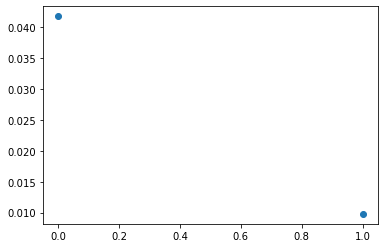

In [25]:
fig, ax = plt.subplots(1)
ax.scatter(np.linspace(0,1,2), aus)

In [14]:
oly[oly['country'] == 'Australia']

,Unnamed: 0,country,2020_mc,2018_mc,2016_mc,2014_mc,2012_mc,2010_mc,2008_mc,2006_mc,2004_mc,2002_mc,2000_mc,1998_mc,1996_mc,1994_mc,1992_mc,1988_mc,1988_gdp,1990_gdp,1992_gdp,1994_gdp,1996_gdp,1998_gdp,2000_gdp,2002_gdp,2004_gdp,2006_gdp,2008_gdp,2010_gdp,2012_gdp,2014_gdp,2016_gdp,2018_gdp,2020_gdp,2020_mp,2018_mp,2016_mp,2014_mp,2012_mp,2010_mp,2008_mp,2006_mp,2004_mp,2002_mp,2000_mp,1998_mp,1996_mp,1994_mp,1992_mp,1988_mp,HDI Rank,1990_hdi,1992_hdi,1994_hdi,1996_hdi,1998_hdi,2000_hdi,2002_hdi,2004_hdi,2006_hdi,2008_hdi,2010_hdi,2012_hdi,2014_hdi,2016_hdi,2018_hdi,2019_hdi
10,10,Australia,45,3.0,29.0,3.0,35.0,3.0,46.0,2.0,50.0,2.0,58.0,1.0,41.0,1.0,27.0,14.0,2.356585e+11,3.107811e+11,3.248843e+11,3.222138e+11,4.003027e+11,3.988991e+11,4.152226e+11,3.946489e+11,6.124904e+11,7.460542e+11,1.053996e+12,1.146138e+12,1.546152e+12,1.467484e+12,1.208847e+12,1.432881e+12,1.330901e+12,0.041822,0.009772,0.029928,0.010239,0.036649,0.011628,0.048218,0.007937,0.054113,0.008547,0.062907,0.004878,0.048926,0.005464,0.03222,0.01649,8.0,0.871,0.873,0.879,0.890,0.896,0.903,0.907,0.911,0.909,0.926,0.93,0.937,0.933,0.939,0.943,0.944


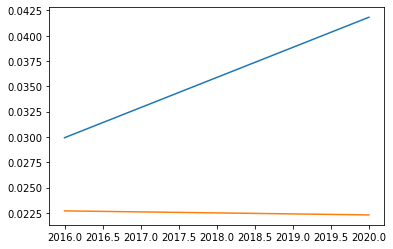

In [82]:
columns = ['2016_mp', '2020_mp']
countries = ['Australia', 'Canada']
years = [2016,2020]

fig, ax = plt.subplots(1)

for country in countries:
    data = oly[oly['country'] == country][columns].values.ravel()
    ax.plot(years, data)

In [85]:
oly[oly['country'] == 'Australia'][columns].values.ravel()

array([0.02992776, 0.04182156])

In [2]:
columns = ['2020_mp', '2020_gdp']
aus = oly[oly['country'] == 'Australia'][columns]
can = oly[oly['country'] == 'Canada'][columns]
can

,2020_mp,2020_gdp
30,0.022305,1.644037e+12


In [4]:
oly_short = pd.concat([aus, can])

In [5]:
oly_short

,2020_mp,2020_gdp
10,0.041822,1.330901e+12
30,0.022305,1.644037e+12


In [21]:
oly[['2020_gdp', '2020_mp']]

,2020_gdp,2020_mp
0,1.980707e+10,0.000000
1,1.479962e+10,0.000000
2,1.451639e+11,0.000000
3,NaN,0.000000
4,NaN,0.000000
5,6.230691e+10,0.000000
6,1.415059e+09,0.000000
7,3.830670e+11,0.002788
8,1.264546e+10,0.003717
9,NaN,0.000000
